In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as ply
import re
from datetime import datetime, timedelta

In [2]:
emotion = pd.read_csv("emotion_data.csv")

In [3]:
emotion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 873 entries, 0 to 872
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Timestamp  873 non-null    float64
 1   Angry      873 non-null    float64
 2   Disgust    873 non-null    float64
 3   Fear       873 non-null    float64
 4   Happy      873 non-null    float64
 5   Sad        873 non-null    float64
 6   Surprise   873 non-null    float64
 7   Neutral    873 non-null    float64
dtypes: float64(8)
memory usage: 54.7 KB


In [4]:
emotion.head()

,Timestamp,Angry,Disgust,Fear,Happy,Sad,Surprise,Neutral
0,1.690921e+09,0.06,0.00,0.09,0.01,0.20,0.05,0.59
1,1.690921e+09,0.14,0.00,0.06,0.02,0.16,0.07,0.55
2,1.690921e+09,0.06,0.00,0.02,0.01,0.08,0.01,0.83
3,1.690921e+09,0.16,0.00,0.04,0.01,0.16,0.02,0.61
4,1.690921e+09,0.05,0.01,0.04,0.02,0.16,0.03,0.68


In [5]:
emotion['timestamps_alt'] = emotion.Timestamp.apply(lambda x: datetime.fromtimestamp(x).strftime('%m/%d/%Y %H:%M:%S.%f')[:-3])

In [6]:
emotion

,Timestamp,Angry,Disgust,Fear,Happy,Sad,Surprise,Neutral,timestamps_alt
0,1.690921e+09,0.06,0.00,0.09,0.01,0.20,0.05,0.59,08/01/2023 16:12:22.631
1,1.690921e+09,0.14,0.00,0.06,0.02,0.16,0.07,0.55,08/01/2023 16:12:22.959
2,1.690921e+09,0.06,0.00,0.02,0.01,0.08,0.01,0.83,08/01/2023 16:12:23.275
3,1.690921e+09,0.16,0.00,0.04,0.01,0.16,0.02,0.61,08/01/2023 16:12:23.595
4,1.690921e+09,0.05,0.01,0.04,0.02,0.16,0.03,0.68,08/01/2023 16:12:23.855
...,...,...,...,...,...,...,...,...,...
868,1.690921e+09,0.10,0.00,0.08,0.00,0.11,0.06,0.64,08/01/2023 16:15:58.510
869,1.690921e+09,0.07,0.00,0.04,0.00,0.13,0.01,0.74,08/01/2023 16:15:58.730
870,1.690921e+09,0.07,0.01,0.06,0.01,0.19,0.02,0.63,08/01/2023 16:15:58.954
871,1.690921e+09,0.10,0.00,0.07,0.01,0.18,0.04,0.60,08/01/2023 16:15:59.174


In [7]:
log_file = open('file.log', 'r', encoding='utf-8')

In [8]:
all_lines = log_file.readlines()

In [9]:
damage_giventime = []
damage_takentime = []

for line in all_lines:
    ts = datetime.strptime(line[:21], '%m/%d/%Y - %H:%M:%S').strftime('%m/%d/%Y %H:%M:%S')
    info = line[23:]
    if info.startswith('Damage Taken'):
        damage = re.findall(r'\d+ in \d+ hits', info)
        if damage == []:
            damage = re.findall(r'\d+ in \d+ hit', info)
        damage = damage[0].split()[0]
        damage_takentime.append((ts, datetime.strptime(ts, '%m/%d/%Y %H:%M:%S').timestamp(), int(damage)))
        #print(damage, 'Taken')
    if info.startswith('Damage Given'):
        damage = re.findall(r'\d+ in \d hits', info)
        if damage == []:
            damage = re.findall(r'\d+ in \d+ hit', info)
        damage = damage[0].split()[0]
        damage_giventime.append((ts, datetime.strptime(ts, '%m/%d/%Y %H:%M:%S').timestamp(), int(damage)))
        #print(damage, 'Given')


In [10]:
damage_giventime

[('08/01/2023 16:07:00', 1690920420.0, 60),
 ('08/01/2023 16:07:23', 1690920443.0, 42),
 ('08/01/2023 16:12:47', 1690920767.0, 190),
 ('08/01/2023 16:13:29', 1690920809.0, 21),
 ('08/01/2023 16:14:03', 1690920843.0, 40),
 ('08/01/2023 16:14:42', 1690920882.0, 54)]

In [33]:
event_kill = damage_giventime[2]
mark_kill = event_kill[1]
tolerance_seconds = 1

# Calculate the start and end timestamps for the emotion_mark interval
start_time_kill = mark_kill - tolerance_seconds
end_time_kill = mark_kill + tolerance_seconds

# Filter the emotion DataFrame to get the emotion_mark data within the specified interval
emotion_mark_kill = emotion[(emotion['Timestamp'] >= start_time_kill) & (emotion['Timestamp'] <= end_time_kill)]

In [34]:
emotion_mark_kill

,Timestamp,Angry,Disgust,Fear,Happy,Sad,Surprise,Neutral,timestamps_alt
75,1.690921e+09,0.07,0.00,0.08,0.00,0.16,0.06,0.63,08/01/2023 16:12:46.133
76,1.690921e+09,0.11,0.01,0.16,0.01,0.29,0.05,0.36,08/01/2023 16:12:46.426
77,1.690921e+09,0.12,0.00,0.06,0.01,0.26,0.03,0.52,08/01/2023 16:12:46.714
78,1.690921e+09,0.06,0.00,0.07,0.02,0.22,0.04,0.59,08/01/2023 16:12:47.008
79,1.690921e+09,0.06,0.00,0.06,0.01,0.28,0.03,0.57,08/01/2023 16:12:47.308
80,1.690921e+09,0.05,0.00,0.08,0.01,0.25,0.04,0.57,08/01/2023 16:12:47.587
81,1.690921e+09,0.07,0.00,0.07,0.01,0.23,0.04,0.58,08/01/2023 16:12:47.904


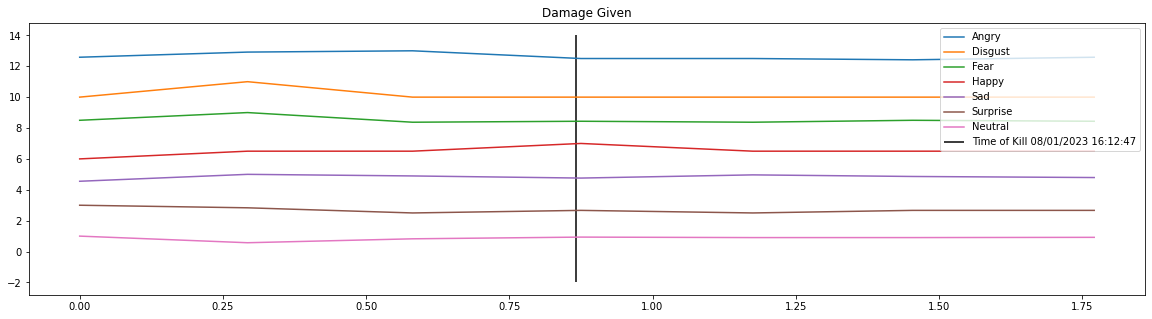

In [35]:
dam = event_kill[2]
Angry_kill = emotion_mark_kill['Angry']
Disgust_kill = emotion_mark_kill['Disgust']
Fear_kill = emotion_mark_kill['Fear']
Happy_kill = emotion_mark_kill['Happy']
Sad_kill = emotion_mark_kill['Sad']
Surprise_kill = emotion_mark_kill['Surprise']
Neutral_kill = emotion_mark_kill['Neutral']

# Convert emotion_mark.Timestamp to pandas Timestamp objects
x_kill = np.array(emotion_mark_kill.Timestamp)

plt.figure(figsize=(20, 5))
plt.plot(x_kill - x_kill[0], Angry_kill / max(abs(Angry_kill)) + 12, label='Angry')
plt.plot(x_kill - x_kill[0], Disgust_kill / max(abs(Disgust_kill)) + 10, label='Disgust')
plt.plot(x_kill - x_kill[0], Fear_kill / max(abs(Fear_kill)) + 8, label='Fear')
plt.plot(x_kill - x_kill[0], Happy_kill / max(abs(Happy_kill)) + 6, label='Happy')
plt.plot(x_kill - x_kill[0], Sad_kill / max(abs(Sad_kill)) + 4, label='Sad')
plt.plot(x_kill - x_kill[0], Surprise_kill / max(abs(Surprise_kill)) + 2, label='Surprise')
plt.plot(x_kill - x_kill[0], Neutral_kill / max(abs(Neutral_kill)), label='Neutral')
plt.vlines(mark_kill - x_kill[0], -2, 14, colors='black', label=f'Time of Kill {event_kill[0]}')
plt.title("Damage Given")
plt.legend(loc='upper right')
plt.show()

In [29]:
damage_takentime

[('08/01/2023 16:05:49', 1690920349.0, 92),
 ('08/01/2023 16:06:00', 1690920360.0, 47),
 ('08/01/2023 16:06:46', 1690920406.0, 67),
 ('08/01/2023 16:07:00', 1690920420.0, 94),
 ('08/01/2023 16:07:00', 1690920420.0, 19),
 ('08/01/2023 16:07:23', 1690920443.0, 54),
 ('08/01/2023 16:07:23', 1690920443.0, 10),
 ('08/01/2023 16:08:09', 1690920489.0, 118),
 ('08/01/2023 16:12:28', 1690920748.0, 27),
 ('08/01/2023 16:12:47', 1690920767.0, 50),
 ('08/01/2023 16:12:54', 1690920774.0, 115),
 ('08/01/2023 16:13:15', 1690920795.0, 103),
 ('08/01/2023 16:13:29', 1690920809.0, 81),
 ('08/01/2023 16:13:44', 1690920824.0, 44),
 ('08/01/2023 16:14:03', 1690920843.0, 106),
 ('08/01/2023 16:14:20', 1690920860.0, 20),
 ('08/01/2023 16:14:32', 1690920872.0, 149),
 ('08/01/2023 16:14:42', 1690920882.0, 106)]

In [38]:
event_death = damage_takentime[14]
mark_death = event_death[1]

# Calculate the start and end timestamps for the emotion_mark interval
start_time_death = mark_death - tolerance_seconds
end_time_death = mark_death + tolerance_seconds

# Filter the emotion DataFrame to get the emotion_mark data within the specified interval
emotion_mark_death = emotion[(emotion['Timestamp'] >= start_time_death) & (emotion['Timestamp'] <= end_time_death)]

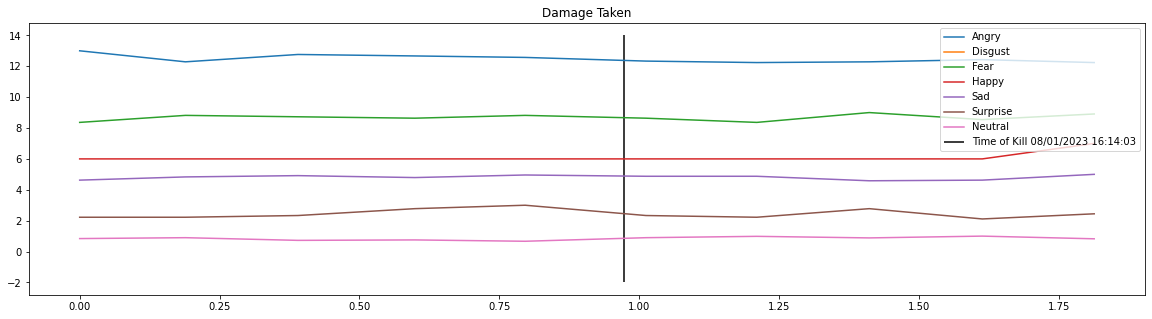

In [39]:
dam = event_death[2]
Angry_death = emotion_mark_death['Angry']
Disgust_death = emotion_mark_death['Disgust']
Fear_death = emotion_mark_death['Fear']
Happy_death = emotion_mark_death['Happy']
Sad_death = emotion_mark_death['Sad']
Surprise_death = emotion_mark_death['Surprise']
Neutral_death = emotion_mark_death['Neutral']

# Convert emotion_mark.Timestamp to pandas Timestamp objects
x_death = np.array(emotion_mark_death.Timestamp)

plt.figure(figsize=(20, 5))
plt.plot(x_death - x_death[0], Angry_death / max(abs(Angry_death)) + 12, label='Angry')
plt.plot(x_death - x_death[0], Disgust_death / max(abs(Disgust_death)) + 10, label='Disgust')
plt.plot(x_death - x_death[0], Fear_death / max(abs(Fear_death)) + 8, label='Fear')
plt.plot(x_death - x_death[0], Happy_death / max(abs(Happy_death)) + 6, label='Happy')
plt.plot(x_death - x_death[0], Sad_death / max(abs(Sad_death)) + 4, label='Sad')
plt.plot(x_death - x_death[0], Surprise_death / max(abs(Surprise_death)) + 2, label='Surprise')
plt.plot(x_death - x_death[0], Neutral_death / max(abs(Neutral_death)), label='Neutral')
plt.vlines(mark_death - x_death[0], -2, 14, colors='black', label=f'Time of Kill {event_death[0]}')
plt.title("Damage Taken")
plt.legend(loc='upper right')
plt.show()